<h1>Thesis Project</h1>

<h3>Data Acquisition & Preprocessing</h3>

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import mplfinance as mpf
from pandas_datareader import data
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score
from sklearn.metrics import mean_absolute_error, roc_curve, auc
from sklearn.metrics import mean_squared_error
import math
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import time
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import requests
import plotly.express as px
import plotly.graph_objects as go

In [2]:
def data_acquisition(stocks=["AAPL", "^GSPC"], start_date="2018-01-01", end_date="2019-12-31"):
    all_stocks_scaled = []

    for stock in stocks:
        response = web.DataReader(stock, data_source='yahoo', start=start_date, end=end_date)

        scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
        names = response.columns
        stock_scaled = scaler.fit_transform(response)
        stock_scaled_df = pd.DataFrame(stock_scaled, columns=names)

        all_stocks_scaled.append(stock_scaled_df)
    
    return all_stocks_scaled

"""microsoft = web.DataReader('MSFT', data_source='yahoo', start="2018-01-01", end="2018-12-31")
amazon = web.DataReader('AMZN', data_source='yahoo', start="2018-01-01", end="2018-12-31")
tesla = web.DataReader('TSLA', data_source='yahoo', start="2018-01-01", end="2018-12-31")
alphabet_a = web.DataReader('GOOGL', data_source='yahoo', start="2018-01-01", end="2018-12-31")
alphabet_c = web.DataReader('GOOG', data_source='yahoo', start="2018-01-01", end="2018-12-31")
unitedhealth = web.DataReader('UNH', data_source='yahoo', start="2018-01-01", end="2018-12-31")
johnsonjohnson = web.DataReader('JNJ', data_source='yahoo', start="2018-01-01", end="2018-12-31")
exxon = web.DataReader('XOM', data_source='yahoo', start="2018-01-01", end="2018-12-31")
jpmorgan = web.DataReader('JPM', data_source='yahoo', start="2018-01-01", end="2018-12-31")
meta = web.DataReader('META', data_source='yahoo', start="2018-01-01", end="2018-12-31")
pg = web.DataReader('PG', data_source='yahoo', start="2018-01-01", end="2018-12-31")
nvidia = web.DataReader('NVDA', data_source='yahoo', start="2018-01-01", end="2018-12-31")
visa = web.DataReader('V', data_source='yahoo', start="2018-01-01", end="2018-12-31")
homedepot = web.DataReader('HD', data_source='yahoo', start="2018-01-01", end="2018-12-31")
chevron = web.DataReader('CVX', data_source='yahoo', start="2018-01-01", end="2018-12-31")
mastercard = web.DataReader('MA', data_source='yahoo', start="2018-01-01", end="2018-12-31")
pfizer = web.DataReader('PFE', data_source='yahoo', start="2018-01-01", end="2018-12-31")
abbvie = web.DataReader('ABBV', data_source='yahoo', start="2018-01-01", end="2018-12-31")
elililly = web.DataReader('LLY', data_source='yahoo', start="2018-01-01", end="2018-12-31")"""

'microsoft = web.DataReader(\'MSFT\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\namazon = web.DataReader(\'AMZN\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\ntesla = web.DataReader(\'TSLA\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nalphabet_a = web.DataReader(\'GOOGL\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nalphabet_c = web.DataReader(\'GOOG\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nunitedhealth = web.DataReader(\'UNH\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\njohnsonjohnson = web.DataReader(\'JNJ\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nexxon = web.DataReader(\'XOM\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\njpmorgan = web.DataReader(\'JPM\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\nmeta = web.DataReader(\'META\', data_source=\'yahoo\', start="2018-01-01", end="2018-12-31")\npg = web.DataReader

In [3]:
stocks = data_acquisition()

In [4]:
"""stocks = [
    apple,
    microsoft,
    amazon,
    tesla,
    alphabet_a,
    alphabet_c,
    unitedhealth,
    johnsonjohnson,
    exxon,
    jpmorgan,
    meta,
    pg,
    nvidia,
    visa,
    homedepot,
    chevron,
    mastercard,
    pfizer,
    abbvie,
    elililly
]"""

'stocks = [\n    apple,\n    microsoft,\n    amazon,\n    tesla,\n    alphabet_a,\n    alphabet_c,\n    unitedhealth,\n    johnsonjohnson,\n    exxon,\n    jpmorgan,\n    meta,\n    pg,\n    nvidia,\n    visa,\n    homedepot,\n    chevron,\n    mastercard,\n    pfizer,\n    abbvie,\n    elililly\n]'

In [5]:
stocks[0].head()

,High,Low,Open,Close,Volume,Adj Close
0,17.929175,18.478848,17.792584,19.853423,16.721388,17.656835
1,19.446882,20.309117,19.403292,19.833616,21.388896,17.637870
2,18.718381,20.390458,19.410084,20.361810,13.044282,18.143538
3,19.999996,21.047997,20.021753,21.662485,14.487888,19.388715
4,20.161888,21.644519,20.640214,21.233333,10.845064,18.977865


In [6]:
def calculate_lines():
    for stock in stocks:
        stock["ShortEMA"] = stock["Close"].ewm(span = 12, adjust = False).mean()
        stock["LongEMA"] = stock["Close"].ewm(span = 26, adjust = False).mean()
        stock["MACD"] = stock["ShortEMA"] - stock["LongEMA"]
        stock["Signal"] = stock["MACD"].ewm(span = 9, adjust = False).mean()
        stock["TypicalPrice"] = (stock["High"] + stock["Low"] + stock["Close"]) / 3
        stock["MA"] = stock["TypicalPrice"].rolling(20).mean()
        stock["MeanDeviation"] = (abs(stock["TypicalPrice"] - stock["MA"])).rolling(20).mean()
        stock["CCI"] = (stock["TypicalPrice"] - stock["MA"]) / (0.015 * stock["MeanDeviation"])
        

In [7]:
calculate_lines()

In [8]:
def calculate_bollinger_bands():
    for stock in stocks:
        stock["30_MA"] = stock["Close"].rolling(window=20).mean()
        stock["30_STD"] = stock["Close"].rolling(window=20).std()
        stock["UpperBollinger"] = stock["30_MA"] + 2 * stock["30_STD"]
        stock["LowerBollinger"] = stock["30_MA"] - 2 * stock["30_STD"]
        stock["DifferenceUpper"] = stock["UpperBollinger"] - stock["Close"]
        stock["DifferenceLower"] = stock["LowerBollinger"] - stock["Close"]

In [9]:
calculate_bollinger_bands()

In [10]:
def upOrDown():
    for stock in stocks:
        stock["UpDown"] = stock["Close"].diff()
        stock["UpDown"] = stock["UpDown"].apply(lambda x: 1 if x >= 0 else 0)

def upOrDownNpArray(array):
    difference = np.diff(array)
    diffReturn = []
    for i in difference:
        if i >= 0:
            diffReturn.append(1)
        else:
            diffReturn.append(0)
    return np.array(diffReturn)

def upOrDownStock(stock):
    stock["UpDown"] = stock["Close"].diff();
    stock["UpDown"] = stock["UpDown"].apply(lambda x: 1 if x >= 0 else 0)

In [11]:
upOrDown()

In [12]:
def calculate_RSI(window=14):
    for stock in stocks:
        delta = stock["Close"].diff()
        up_days = delta.copy()
        up_days[delta<=0]=0.0
        down_days = abs(delta.copy())
        down_days[delta>0]=0.0
        RS_up = up_days.rolling(window).mean()
        RS_down = down_days.rolling(window).mean()
        rsi= 100-100/(1+RS_up/RS_down)
        stock["RSI"] = rsi

In [13]:
calculate_RSI()

In [14]:
def calculate_stochastic_oscillator(window=14):
    for stock in stocks:
        nHigh = stock["High"].rolling(window).max()
        nLow = stock["Low"].rolling(window).min()
        stock["StochasticOscillator"] = ((stock["Close"] - nLow) / (nHigh - nLow)) * 100

In [15]:
calculate_stochastic_oscillator()

In [16]:
stocks[0].head()

,High,Low,Open,Close,Volume,Adj Close,ShortEMA,LongEMA,MACD,Signal,...,CCI,30_MA,30_STD,UpperBollinger,LowerBollinger,DifferenceUpper,DifferenceLower,UpDown,RSI,StochasticOscillator
0,17.929175,18.478848,17.792584,19.853423,16.721388,17.656835,19.853423,19.853423,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,19.446882,20.309117,19.403292,19.833616,21.388896,17.637870,19.850375,19.851955,-0.001580,-0.000316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,18.718381,20.390458,19.410084,20.361810,13.044282,18.143538,19.929058,19.889722,0.039335,0.007614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
3,19.999996,21.047997,20.021753,21.662485,14.487888,19.388715,20.195739,20.021038,0.174701,0.041032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,20.161888,21.644519,20.640214,21.233333,10.845064,18.977865,20.355369,20.110838,0.244531,0.081731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [17]:
def show_corr_matrix(stock):
    corrMatrix = stock[["Close", "RSI", "UpperBollinger", "LowerBollinger", "DifferenceUpper", "DifferenceLower", "StochasticOscillator", "ShortEMA", "LongEMA", "MACD", "CCI"]].corr()


    plt.figure(figsize = (10,10))
    sns.heatmap(corrMatrix, cmap='RdYlGn', center=0, annot=True)
    plt.show()

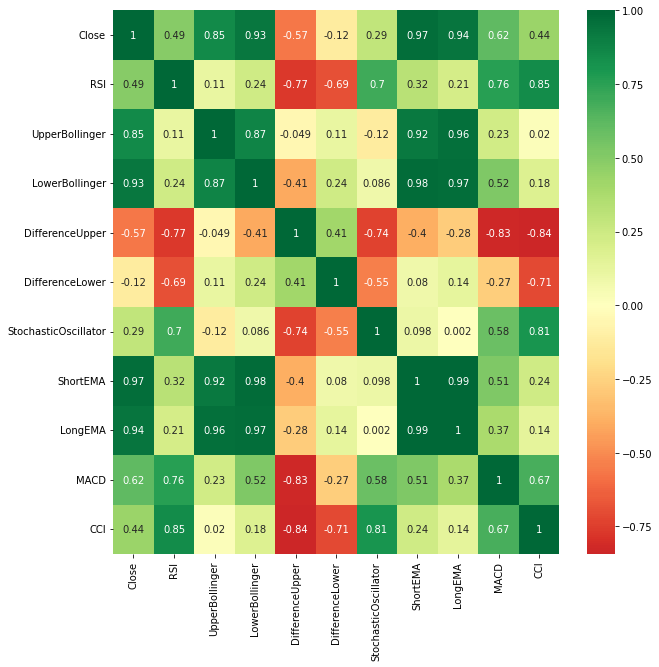

In [18]:
show_corr_matrix(stocks[1])

<h1>Ensemble Algorithms</h1>

<h3>XGBoost Model</h3>

In [19]:
from sklearn import ensemble

def predict_xgboost(stock, feature='close', day_threshold=5):
    if feature == 'close':
        stockX = stock[["Close", "RSI", "UpperBollinger", "LowerBollinger", "DifferenceUpper", "DifferenceLower", "StochasticOscillator", "ShortEMA", "MACD", "CCI"]][40:]
        stockY = stock["Close"][40:]

        X = np.array(stockX)
        y = np.array(stockY)
        X = X[:-day_threshold]
        y = y[day_threshold:]

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=False)

        """
            Gotta do some kind of random/grid search
        """

        params = {
            "n_estimators": 500,
            "max_depth": 4,
            "min_samples_split": 5,
            "learning_rate": 0.01,
            "loss": "squared_error",
        }

        reg = ensemble.GradientBoostingRegressor(**params)
        reg.fit(X_train, y_train)

        y_pred = reg.predict(X_test)

        return y_pred, y_test, y_train

<h1>Regression Algorithms</h1>

<h3>Kernel Ridge Regression Model</h3>

In [20]:
def predict_kernel_ridge(stock, feature='close', day_threshold=5):
    stockX = stock[["RSI", "UpperBollinger", "LowerBollinger", "DifferenceUpper", "DifferenceLower", "StochasticOscillator", "ShortEMA", "MACD", "CCI"]][40:]
    stockY = stock["Close"][40:]

    X = np.array(stockX)
    y = np.array(stockY)
    X = X[:-day_threshold]
    y = y[day_threshold:]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=False)

    krr = KernelRidge(alpha=1.0)
    krr.fit(X_train, y_train)

    y_pred = krr.predict(X_test)

    return y_pred, y_test, y_train

<h1>Predictions and Plotting</h1>

In [21]:
def switcher(stock, feature, day_threshold, model_name):
    if model_name == "KRR":
        return predict_kernel_ridge(stock, feature, day_threshold)
    elif model_name == "XGBOOST":
        return predict_xgboost(stock, feature, day_threshold)

def predict_plot(stock, feature='close', day_threshold=5, model='KRR', confusion_matrix=False):
    model_name = model.upper()

    y_pred, y_test, y_train = switcher(stock, feature, day_threshold, model_name)
    
    y_pred = y_pred[day_threshold:]
    y_test = y_test[:-day_threshold]
    
    predictUpDown = upOrDownNpArray(y_pred)
    realUpDown = upOrDownNpArray(y_test)
    
    if confusion_matrix:
        plt.figure(figsize = (10,8))

        matrix = confusion_matrix(realUpDown, predictUpDown)
        sns.heatmap(matrix, cmap='RdYlGn', center=0, annot=True)
        
        plt.xlabel('Prediction')
        plt.ylabel('Actual Value')
        plt.title('Confusion Matrix')
        plt.show()

    f_score = f1_score(realUpDown, predictUpDown)
    precision = precision_score(realUpDown, predictUpDown)
    accuracy = accuracy_score(realUpDown, predictUpDown)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred, squared=True)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    df = pd.DataFrame(y_pred, columns=['Prediction'])
    df['Actual'] = y_test

    fig = go.Figure()
    fig.add_trace(go.Scatter(y=df["Prediction"], name="Prediction", mode="lines"))
    fig.add_trace(go.Scatter(y=df["Actual"], name="Actual Value", mode="markers"))
    fig.update_layout(
        title=f"Normalized Prediction for {model_name} with {day_threshold} Days of Threshold", xaxis_title="Date", yaxis_title="Close"
    )
    fig.update_layout(go.Layout(
        annotations=[
            go.layout.Annotation(
                text=f"""
                    F1-Score: {"{:.3f}".format(f_score)} <br />
                    Precision: {"{:.3f}".format(precision)} <br />
                    Accuracy: {"{:.3f}".format(accuracy)} <br />
                    MAE: {"{:.3f}".format(mae)} <br />
                    MSE: {"{:.3f}".format(mse)} <br />
                    RMSE: {"{:.3f}".format(rmse)} <br />
                """,
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.11,
                y=0
            )
        ]
    ))
    fig.show()

<h3>XGBoost Predictions</h3>

In [22]:
predict_plot(stocks[0], day_threshold=30, model='xgboost')

<h3>KRR Predictions</h3>

In [23]:
predict_plot(stocks[0], day_threshold=30, model='krr')